# Lecture 10

## Esercizio 10.1

Ci proponiamo di risolvere il problema del commesso viaggiatore (TSP: Travaling Salesman Problem) mediante l'utilizzo di un Algoritmo di Simulated Annealing (SA).

Il TSP consiste nel trovare il percorso più breve tra $N$ città, visitandole tutte una sola volta e tornando infine alla città di partenza. Per fare ciò, date le coordinate delle città $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, si cerca di minimizzare il funzionale costo, che qui cosideriamo essere la lunghezza totale del percorso $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)=\sum_{i=1}^{N}|\vec{x}_i-\vec{x}_{i+1}|$, dove l'indice $N+1$ si intende uguale a $1$.
In generale, un percorso sarà dato da $\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N=\vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}$ dove $P$ è una permutazione generica degli indici.
Fissiamo inoltre arbitrariamente la prima città, che resta il punto di partenza e di arrivo durante tutta la simulazione.

Alla base del SA sta l'assimilazione del nostro problema di ottimizzazione ad un sistema termodinamico: come quest'ultimo viene lentamente raffreddato per raggiungere la configurazione di minima energia, così noi interpretiamo la funzione costo $L$ come "energia" della distribuzione di probabilità di Boltzmann, andando a cercare di minimizzarla "raffreddando" lentamente il sistema. Così partendo da una $\beta=0.004$ e dunque da una temperatura $T=1/\beta=250K$ procediamo ad aumentare $\beta$ in modo lento, secondo uno scaling del tipo $\beta_{i+1}=\beta_{i}\times c$, dove $c>1$ è un parametro che regola la crescita di $\beta$, che ho scelto uguale a $1.015$.
Per implementare il SA, adoperiamo le stesse mutazioni utilizzate nell'Algoritmo Genetico con la medesima probabilità $p_{mut}=0.07$, che intervengono ogni volta che si compie una nuova iterazione. Tali modifiche di $L$ possono essere poi accettate o rigettate: se la lunghezza corrispondente al nuovo percorso è minore rispetto a quella del percorso vecchio, allora la mossa viene sempre accettata, altrimenti viene accetata con probabilità pari al peso di Boltzmann.

Per il nostro specifico problema legato alla visita di $N=32$ città, ho scelto di considerare $10^6$ iterazioni totali, imponendo un cambio di temperatura ogni $1000$ iterazioni, valutando quindi $1000$ valori di temperatura (ossia di $\beta$) diversi. 
Considerando il valore iniziale di $\beta=0.004$ e dunque una temperatura iniziale di $T=1/\beta=250K$, prendendo $c=1.015$, si porta il sistema ad una temperatura finale di circa $T_{fin}=0.000085$.


## Città su una circonferenza

Nel primo caso, le città che il viaggiatore deve visitare sono tutte disposte (casualmente) su una circonferenza, che ho fissato avere raggio $r=1$. 
Di seguito i grafici che riportano la lunghezza del percorso migliore in funzione del numero di iterazioni; infine, il plot del percorso migliore trovato con l'Algoritmo SA.

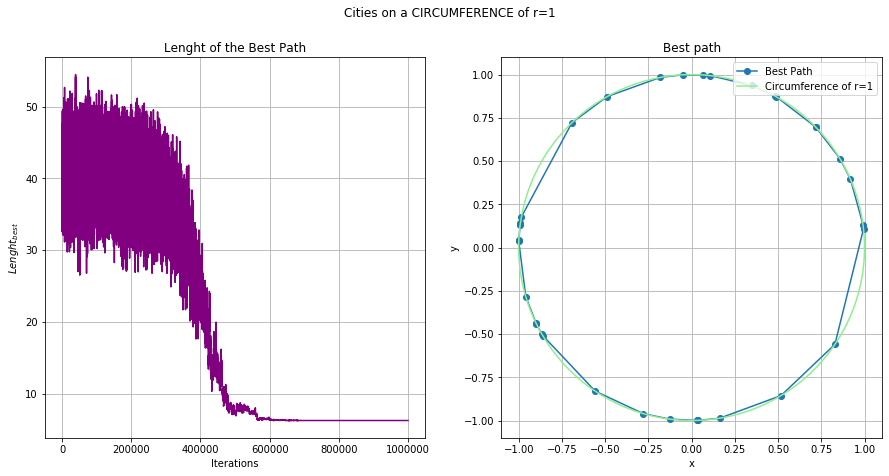

Lenght of the Best Path:  6.2403


In [26]:
import numpy as np
import matplotlib.pyplot as plt

c_best=np.loadtxt("CIRCLE_fitness.dat", usecols=(0), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("CIRCLE_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(0,figsize=(15,7))
plt.suptitle("Cities on a CIRCUMFERENCE of r=1")
c_gen=np.linspace(1,1000000,1000000)

plt.subplot(121)
plt.plot(c_gen,c_best, color='purple')
plt.title("Lenght of the Best Path")
plt.xlabel("Iterations")
plt.ylabel("$Lenght_{best}$")
plt.grid(True)

plt.subplot(122)
theta=np.linspace(0,2*np.pi,500)
radius=1
x=radius*np.cos(theta)
y=radius*np.sin(theta)
plt.plot(c_x,c_y,'-o',label='Best Path')
plt.plot(x,y,label='Circumference of r=1', color='lightgreen')
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()
print("Lenght of the Best Path: ", c_best[-1])

Come vediamo, la lunghezza del percorso migliore sembra stabilizzarsi dopo circa $600000$ iterazioni. Notiamo che il Best Path ottenuto con il SA risulta speculare a quello ottenuto dal GA. Mi pare importante ricordare che non è garantito che i due algoritmi portino alla soluzione ottimale, bensì essi portano soltanto a una "buona" soluzione: il fatto che in tal caso le due migliori proposte ottenute separatamente risultino uguali ci potrebbe far pensare che si tratti proprio della soluzione ottimale.

## Città in un quadrato

Consideriamo ora le nostre città da visitare distribuite casualmente all'interno di un quadrato di lato fissato $L=2$.
Di seguito i grafici che riportano la lunghezza del percorso migliore in funzione del numero di iterazioni; infine, il plot del percorso migliore trovato con l'Algoritmo SA.

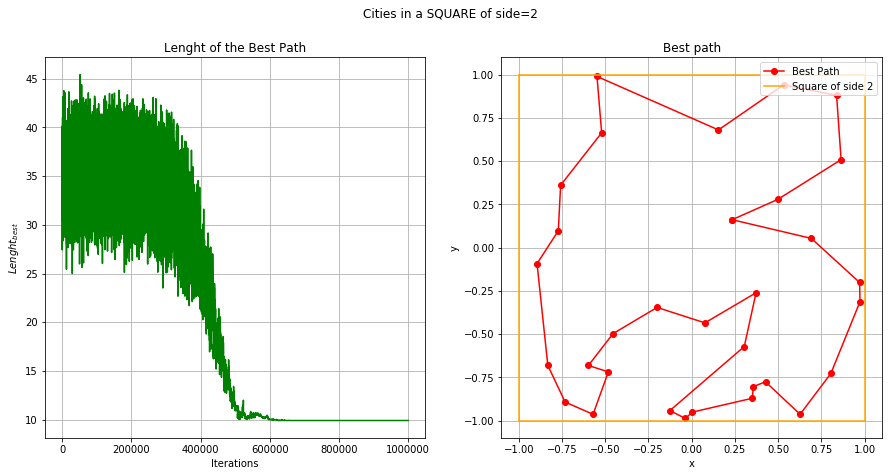

Lenght of the Best Path:  9.8983


In [32]:
import numpy as np
import matplotlib.pyplot as plt

c_best=np.loadtxt("SQUARE_fitness.dat", usecols=(0), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("SQUARE_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(0,figsize=(15,7))
plt.suptitle("Cities in a SQUARE of side=2")
c_gen=np.linspace(1,1000000,1000000)


plt.subplot(121)
plt.plot(c_gen,c_best, color='green')
plt.title("Lenght of the Best Path")
plt.xlabel("Iterations")
plt.ylabel("$Lenght_{best}$")
plt.grid(True)

plt.subplot(122)
plt.plot(c_x,c_y,'-o',label='Best Path', color='red')
x_left=np.linspace(-1,1,100)
x_right=np.linspace(-1,1,100)
for i in range(100):
    x_left[i]=-1
    x_right[i]=+1
x=np.linspace(-1,1,100)
plt.plot(x,x_left,color='orange',label='Square of side 2')
plt.plot(x,x_right,color='orange')
plt.plot(x_right,x,color='orange')
plt.plot(x_left,x,color='orange')
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()
print("Lenght of the Best Path: ", c_best[-1])

Come vediamo, anche in tal caso la lunghezza del percorso migliore sembra stabilizzarsi dopo circa $600000$ iterazioni. Nuovamente il Best Path ottenuto con il SA risulta speculare a quello ottenuto dal GA, il che ancora ci potrebbe far pensare che si tratti proprio della soluzione ottimale.

## Esercizio 10.2

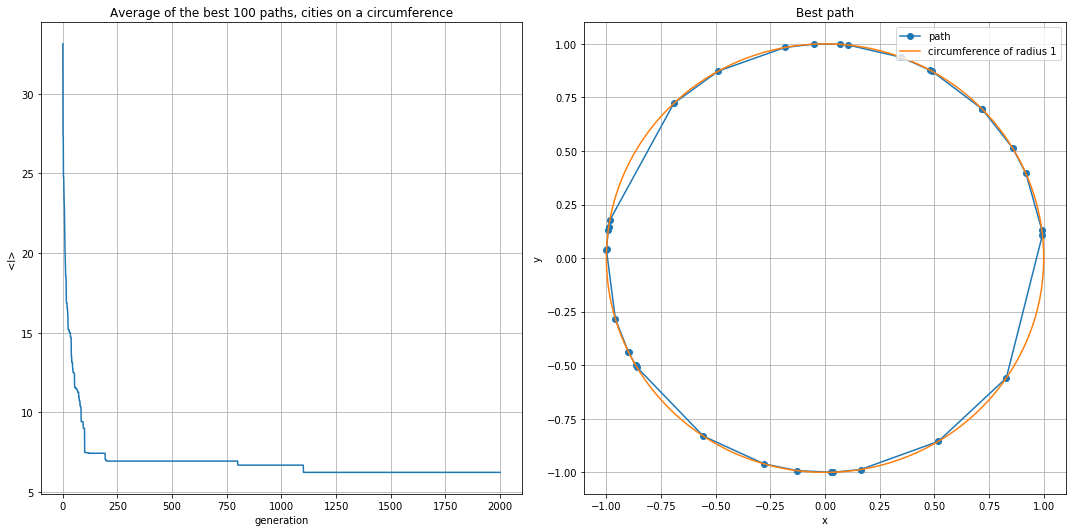

6.2403


In [30]:
import numpy as np
import matplotlib.pyplot as plt

c_best=np.loadtxt("10_2/0_circle_fitness.dat", usecols=(0), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("10_2/0_circle_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(0,figsize=(15,7.5))
c_gen=np.linspace(1,2000,2000)
c_cities=np.linspace(1,32,1)

plt.subplot(121)
plt.plot(c_gen,c_best,label="best")
plt.title("Average of the best 100 paths, cities on a circumference")
plt.xlabel("generation")
plt.ylabel("<l>")
plt.grid(True)

plt.subplot(122)
theta=np.linspace(0,2*np.pi,500)
radius=1
x=radius*np.cos(theta)
y=radius*np.sin(theta)
plt.plot(c_x,c_y,'-o',label='path')
plt.plot(x,y,label='circumference of radius 1')
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.tight_layout()
plt.show()
print(c_best[1499])

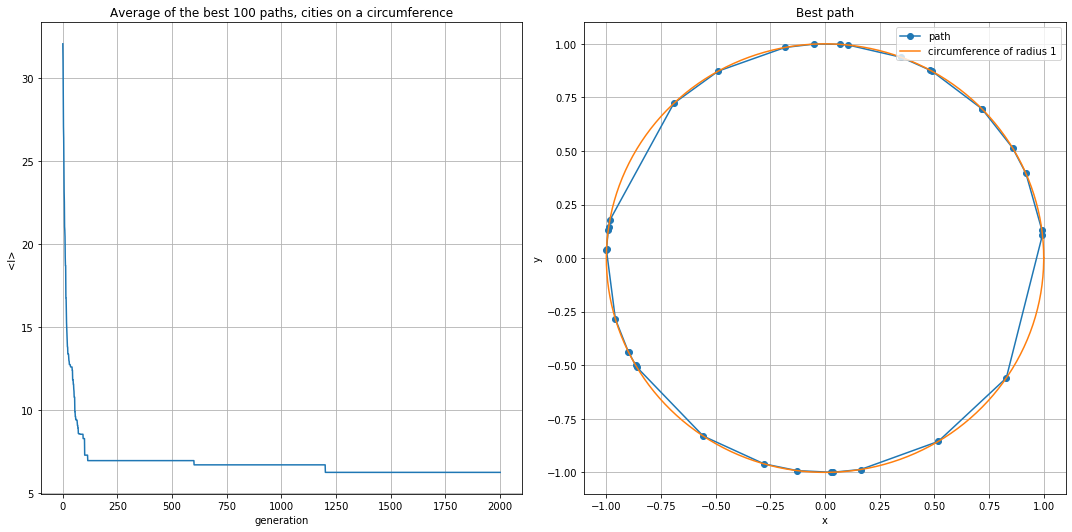

6.2403


In [31]:
import numpy as np
import matplotlib.pyplot as plt

c_best=np.loadtxt("10_2/1_circle_fitness.dat", usecols=(0), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("10_2/1_circle_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(0,figsize=(15,7.5))
c_gen=np.linspace(1,2000,2000)
c_cities=np.linspace(1,32,1)

plt.subplot(121)
plt.plot(c_gen,c_best,label="best")
plt.title("Average of the best 100 paths, cities on a circumference")
plt.xlabel("generation")
plt.ylabel("<l>")
plt.grid(True)

plt.subplot(122)
theta=np.linspace(0,2*np.pi,500)
radius=1
x=radius*np.cos(theta)
y=radius*np.sin(theta)
plt.plot(c_x,c_y,'-o',label='path')
plt.plot(x,y,label='circumference of radius 1')
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.tight_layout()
plt.show()
print(c_best[1499])

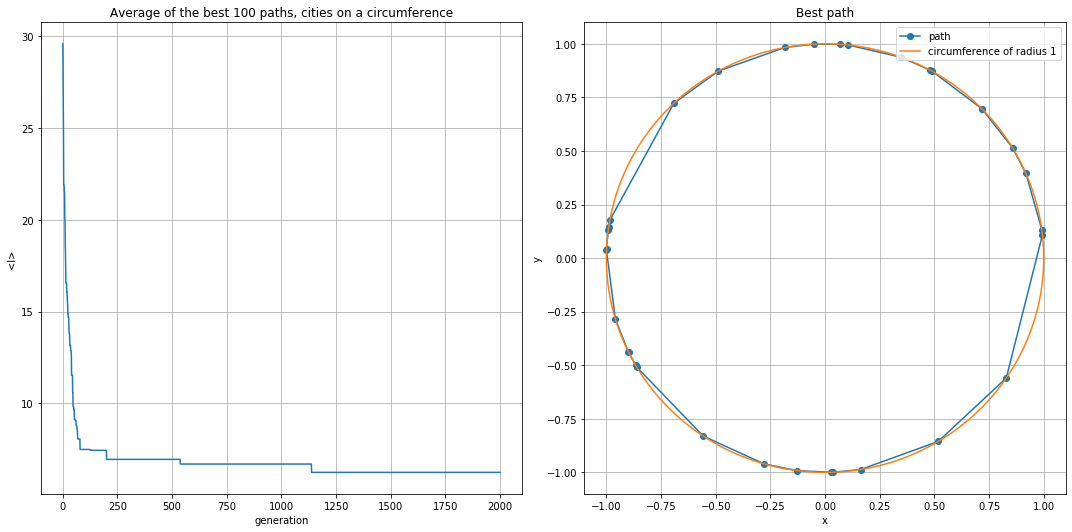

6.2403


In [32]:
import numpy as np
import matplotlib.pyplot as plt

c_best=np.loadtxt("10_2/2_circle_fitness.dat", usecols=(0), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("10_2/2_circle_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(0,figsize=(15,7.5))
c_gen=np.linspace(1,2000,2000)
c_cities=np.linspace(1,32,1)

plt.subplot(121)
plt.plot(c_gen,c_best,label="best")
plt.title("Average of the best 100 paths, cities on a circumference")
plt.xlabel("generation")
plt.ylabel("<l>")
plt.grid(True)

plt.subplot(122)
theta=np.linspace(0,2*np.pi,500)
radius=1
x=radius*np.cos(theta)
y=radius*np.sin(theta)
plt.plot(c_x,c_y,'-o',label='path')
plt.plot(x,y,label='circumference of radius 1')
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.tight_layout()
plt.show()
print(c_best[1499])

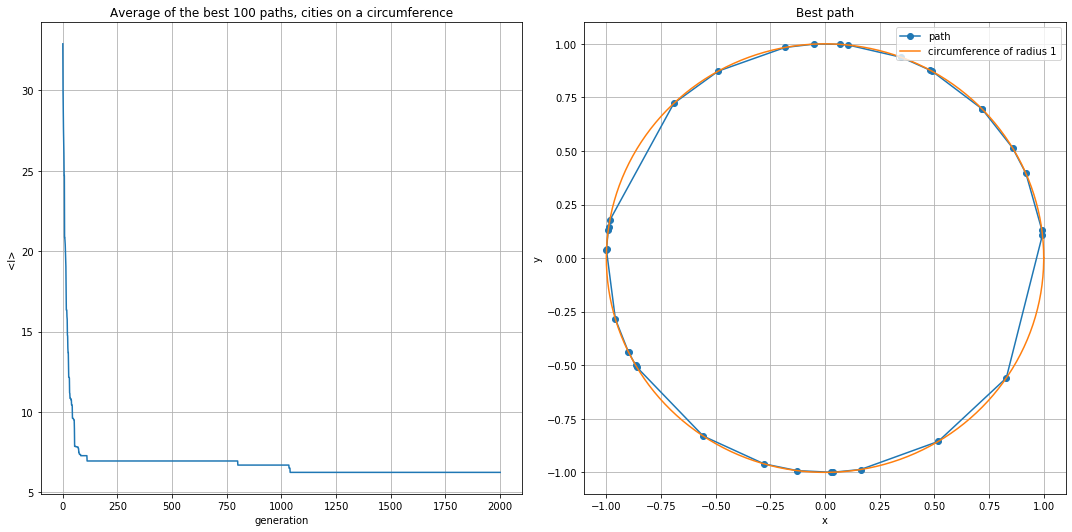

6.2403


In [33]:
import numpy as np
import matplotlib.pyplot as plt

c_best=np.loadtxt("10_2/3_circle_fitness.dat", usecols=(0), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("10_2/3_circle_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(0,figsize=(15,7.5))
c_gen=np.linspace(1,2000,2000)
c_cities=np.linspace(1,32,1)

plt.subplot(121)
plt.plot(c_gen,c_best,label="best")
plt.title("Average of the best 100 paths, cities on a circumference")
plt.xlabel("generation")
plt.ylabel("<l>")
plt.grid(True)

plt.subplot(122)
theta=np.linspace(0,2*np.pi,500)
radius=1
x=radius*np.cos(theta)
y=radius*np.sin(theta)
plt.plot(c_x,c_y,'-o',label='path')
plt.plot(x,y,label='circumference of radius 1')
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.tight_layout()
plt.show()
print(c_best[1499])

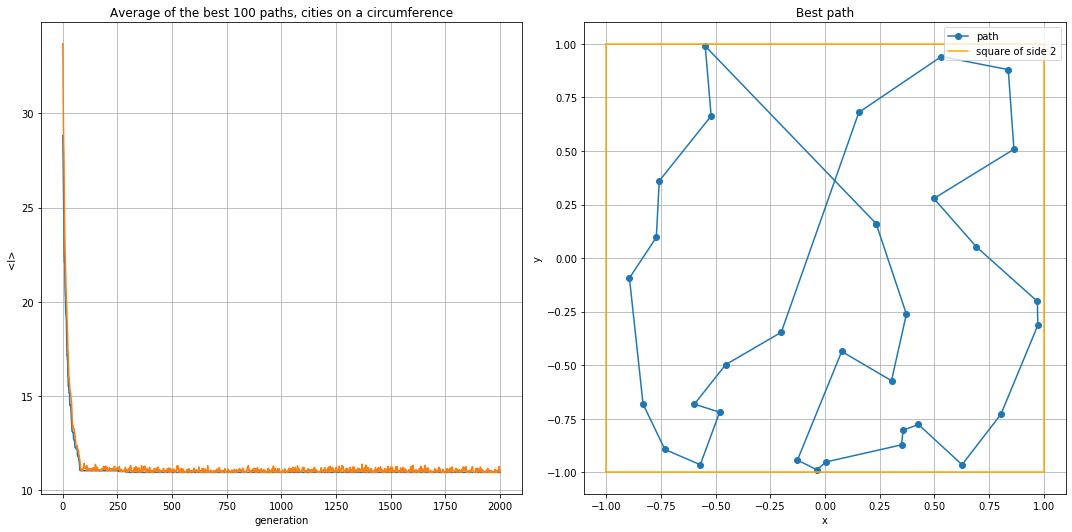

10.9479


In [34]:
import numpy as np
import matplotlib.pyplot as plt

c_best,c_ave=np.loadtxt("10_2/0_square_fitness.dat", usecols=(0,1), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("10_2/0_square_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(0,figsize=(15,7.5))
c_gen=np.linspace(1,2000,2000)


plt.subplot(121)
plt.plot(c_gen,c_best,label="best")
plt.plot(c_gen,c_ave,label="best")
plt.title("Average of the best 100 paths, cities on a circumference")
plt.xlabel("generation")
plt.ylabel("<l>")
plt.grid(True)

plt.subplot(122)
plt.plot(c_x,c_y,'-o',label='path')
x_left=np.linspace(-1,1,100)
x_right=np.linspace(-1,1,100)
for i in range(100):
    x_left[i]=-1
    x_right[i]=+1
x=np.linspace(-1,1,100)
plt.plot(x,x_left,color='orange',label='square of side 2')
plt.plot(x,x_right,color='orange')
plt.plot(x_right,x,color='orange')
plt.plot(x_left,x,color='orange')
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.tight_layout()
plt.show()
print(c_best[1499])

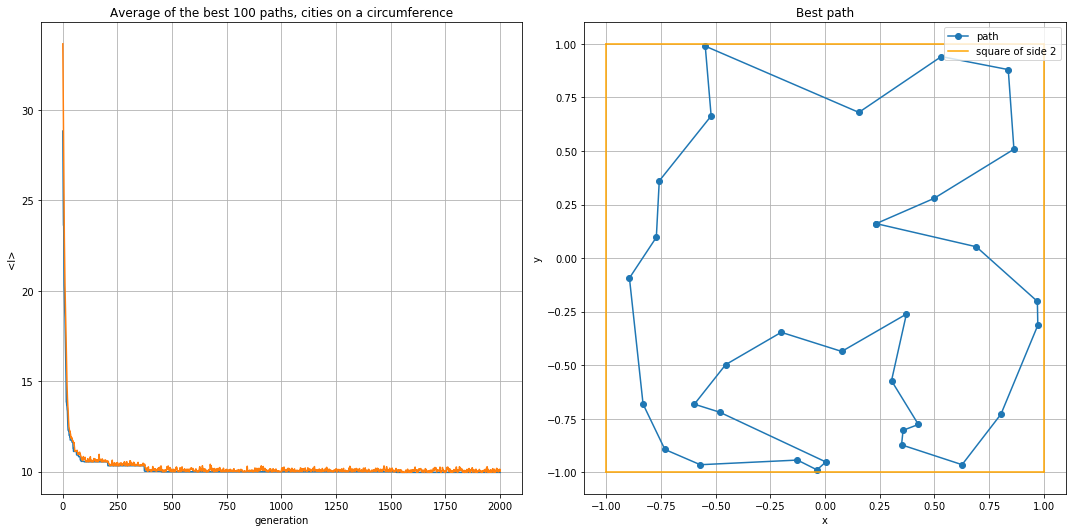

9.98865


In [35]:
import numpy as np
import matplotlib.pyplot as plt

c_best,c_ave=np.loadtxt("10_2/1_square_fitness.dat", usecols=(0,1), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("10_2/1_square_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(0,figsize=(15,7.5))
c_gen=np.linspace(1,2000,2000)


plt.subplot(121)
plt.plot(c_gen,c_best,label="best")
plt.plot(c_gen,c_ave,label="best")
plt.title("Average of the best 100 paths, cities on a circumference")
plt.xlabel("generation")
plt.ylabel("<l>")
plt.grid(True)

plt.subplot(122)
plt.plot(c_x,c_y,'-o',label='path')
x_left=np.linspace(-1,1,100)
x_right=np.linspace(-1,1,100)
for i in range(100):
    x_left[i]=-1
    x_right[i]=+1
x=np.linspace(-1,1,100)
plt.plot(x,x_left,color='orange',label='square of side 2')
plt.plot(x,x_right,color='orange')
plt.plot(x_right,x,color='orange')
plt.plot(x_left,x,color='orange')
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.tight_layout()
plt.show()
print(c_best[1499])

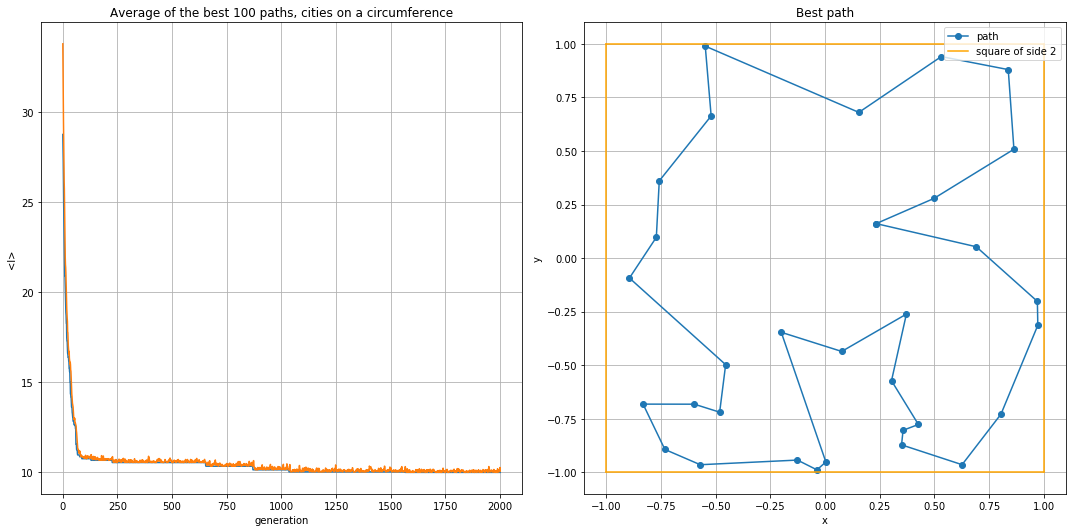

10.0177


In [36]:
import numpy as np
import matplotlib.pyplot as plt

c_best,c_ave=np.loadtxt("10_2/2_square_fitness.dat", usecols=(0,1), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("10_2/2_square_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(0,figsize=(15,7.5))
c_gen=np.linspace(1,2000,2000)


plt.subplot(121)
plt.plot(c_gen,c_best,label="best")
plt.plot(c_gen,c_ave,label="best")
plt.title("Average of the best 100 paths, cities on a circumference")
plt.xlabel("generation")
plt.ylabel("<l>")
plt.grid(True)

plt.subplot(122)
plt.plot(c_x,c_y,'-o',label='path')
x_left=np.linspace(-1,1,100)
x_right=np.linspace(-1,1,100)
for i in range(100):
    x_left[i]=-1
    x_right[i]=+1
x=np.linspace(-1,1,100)
plt.plot(x,x_left,color='orange',label='square of side 2')
plt.plot(x,x_right,color='orange')
plt.plot(x_right,x,color='orange')
plt.plot(x_left,x,color='orange')
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.tight_layout()
plt.show()
print(c_best[1499])

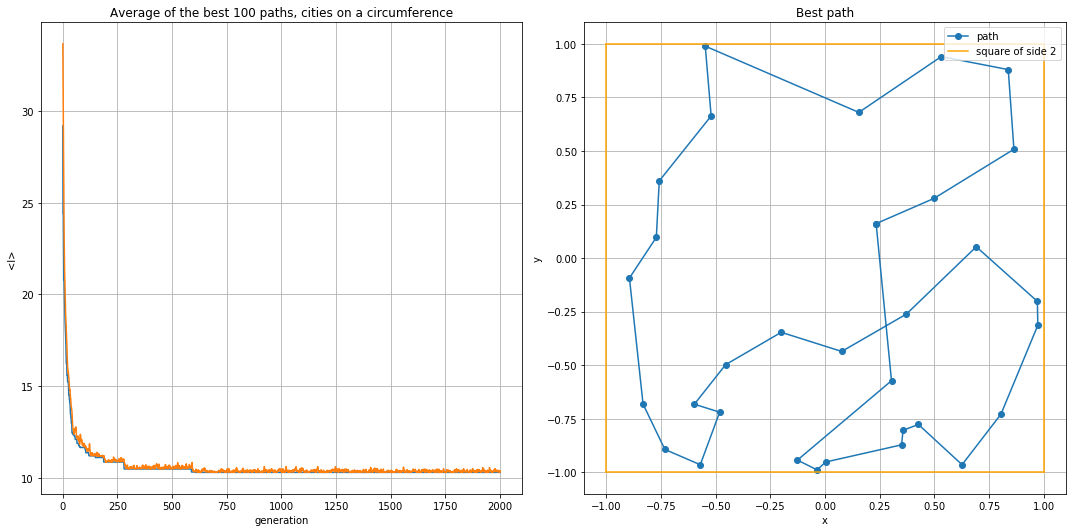

10.2942


In [37]:
import numpy as np
import matplotlib.pyplot as plt

c_best,c_ave=np.loadtxt("10_2/3_square_fitness.dat", usecols=(0,1), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("10_2/3_square_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(0,figsize=(15,7.5))
c_gen=np.linspace(1,2000,2000)


plt.subplot(121)
plt.plot(c_gen,c_best,label="best")
plt.plot(c_gen,c_ave,label="best")
plt.title("Average of the best 100 paths, cities on a circumference")
plt.xlabel("generation")
plt.ylabel("<l>")
plt.grid(True)

plt.subplot(122)
plt.plot(c_x,c_y,'-o',label='path')
x_left=np.linspace(-1,1,100)
x_right=np.linspace(-1,1,100)
for i in range(100):
    x_left[i]=-1
    x_right[i]=+1
x=np.linspace(-1,1,100)
plt.plot(x,x_left,color='orange',label='square of side 2')
plt.plot(x,x_right,color='orange')
plt.plot(x_right,x,color='orange')
plt.plot(x_left,x,color='orange')
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.tight_layout()
plt.show()
print(c_best[1499])

300 indiv 2000 gen ogni 100 scambio